<img src="./pics/Title.png" align="center"/>

# Machine learning...
## is about machines improving from  data, knowledge, experience, and interaction.
#### Some celebrity @Carnegie Mellon University
<img src="./pics/ml.jpg">

# Labels define our world !

<img src="./pics/sup_learning.png" align="center"/>

# Clustering and the 'why'

<img src="./pics/JB.png" align="center"/>

# IRIS dataset :
## a tale of behind-the-scene life scientists

<img src="./pics/iris_types.png" alignment="center"/>

## Hands-on now :
# Getting the data

In [28]:
from sklearn import datasets
Iris = datasets.load_iris() ## A dictionary-like data structure

In [29]:
Iris.keys()

['target', 'DESCR', 'target_names', 'feature_names', 'data', 'filename']

In [30]:
Iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [31]:
Iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='|S10')

In [32]:
Iris['data'].shape

(150L, 4L)

In [33]:
Iris['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [34]:
targets = Iris.target
targets.shape

(150L,)

In [35]:
set(targets)

{0, 1, 2}

# Visualization

# 1-D
## Histograms

In [36]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('seaborn-poster')

petal length (cm)


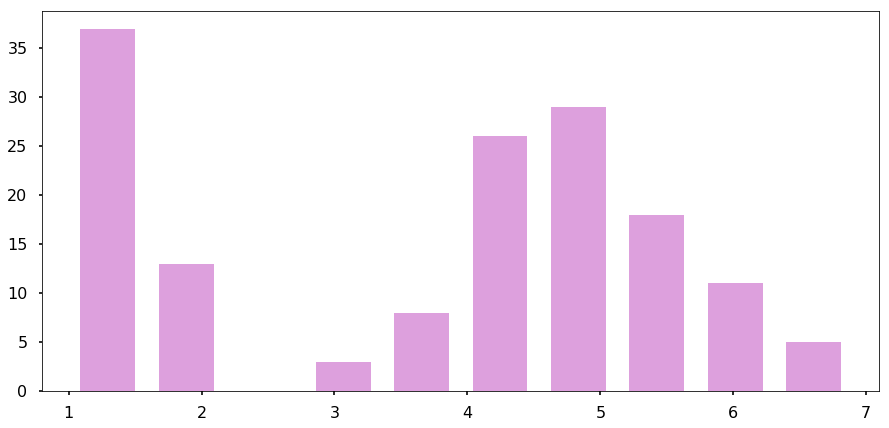

In [37]:
plt.figure(figsize=(15, 7))
plt.hist(Iris['data'][:, 2], rwidth=.7, color='plum')
print(Iris['feature_names'][2])

# 2-D
## Scatter plot

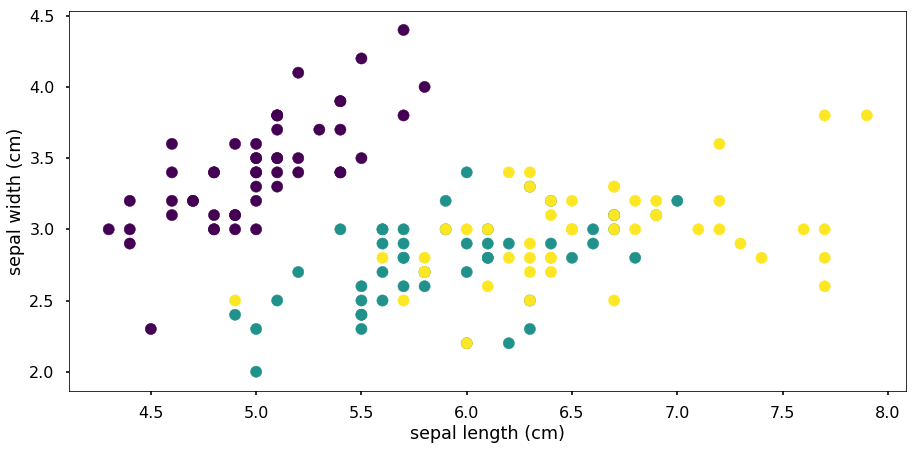

In [38]:
plt.figure(figsize=(15, 7))
plt.scatter(Iris['data'][:, 0], Iris['data'][:, 1], c=Iris['target'])
plt.xlabel(Iris['feature_names'][0])
plt.ylabel(Iris['feature_names'][1])
plt.show()

# 3-D
## ... more scatter plots

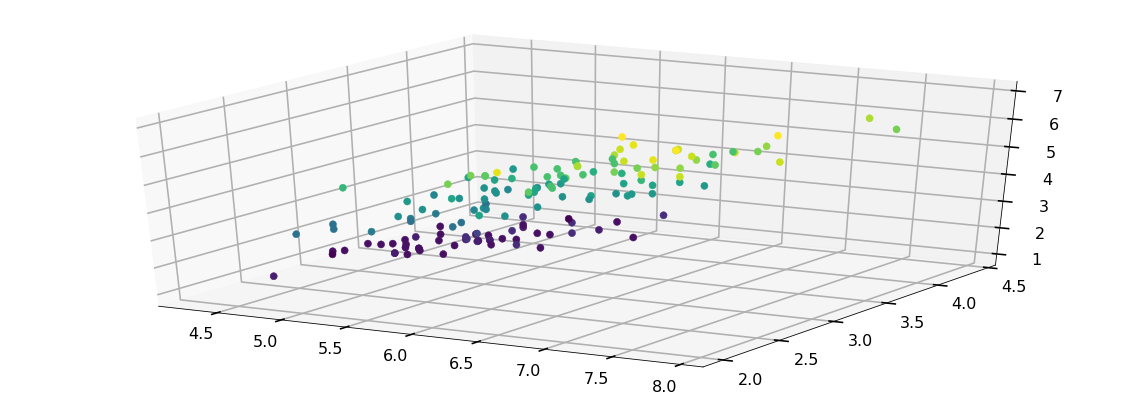

In [39]:
from mpl_toolkits.mplot3d import Axes3D
ax = plt.figure(figsize=(20, 7)).add_subplot(111, projection='3d')
ax.scatter(Iris['data'][:, 0], Iris['data'][:, 1], Iris['data'][:, 2], c=Iris['data'][:, 3], marker = 'o', depthshade=False, s=50);

## A better 2-D view :
### Principal Component Analysis (PCA)
### PCA finds a new coordinate system in which points separate well.

In [40]:
from sklearn.decomposition import PCA

In [41]:
pca_data = PCA(n_components=2).fit_transform(Iris['data'])
print (Iris['data'].shape)
print (pca_data.shape)

(150L, 4L)
(150L, 2L)


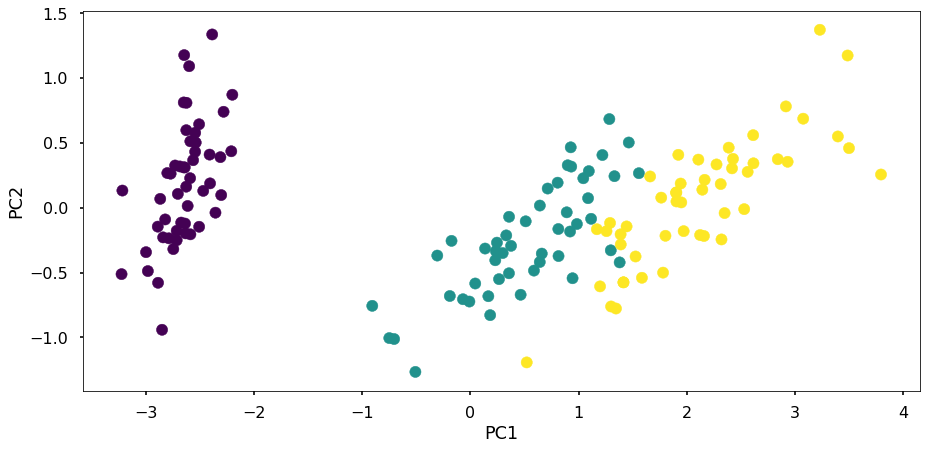

In [42]:
plt.figure(figsize=(15, 7))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=Iris['target'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


# The Scikit-Learn API

<img src="./pics/the_sklearn_api.jpg" alignment="center"/>

# Clustering with Scikit-learn

<img src=".\pics\sklearn_clustering.png"/>

## Mean Shift

In [43]:
from sklearn.cluster import MeanShift

In [1]:
#help(MeanShift)

In [45]:
ms = MeanShift(bandwidth=.85)
ms.fit_predict(Iris['data'])
y_pred = ms.labels_

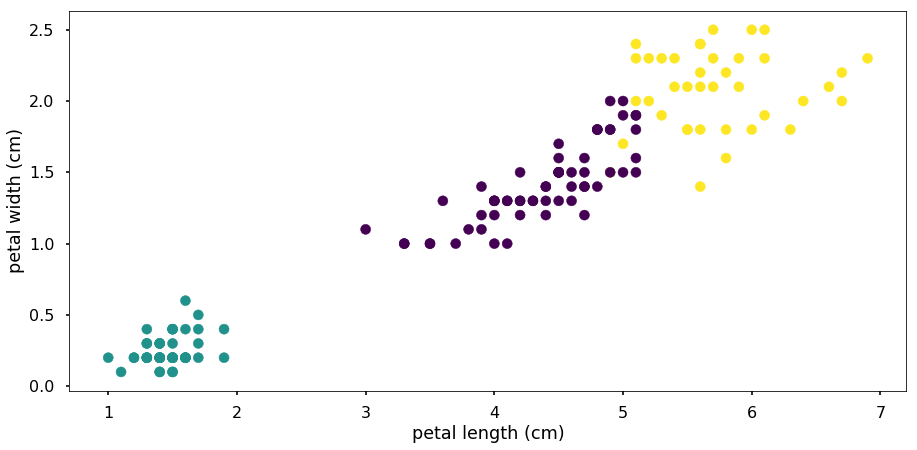

In [46]:
plt.figure(figsize=(15, 7))
plt.scatter(Iris['data'][:, 2], Iris['data'][:, 3], s=100, c=y_pred)
plt.xlabel(Iris['feature_names'][2])
plt.ylabel(Iris['feature_names'][3])
plt.show()

## Spectral Clustering

In [47]:
from sklearn.cluster import SpectralClustering

In [48]:
sc = SpectralClustering(n_clusters=3)
sc.fit_predict(Iris['data'])
sc_pred = sc.labels_

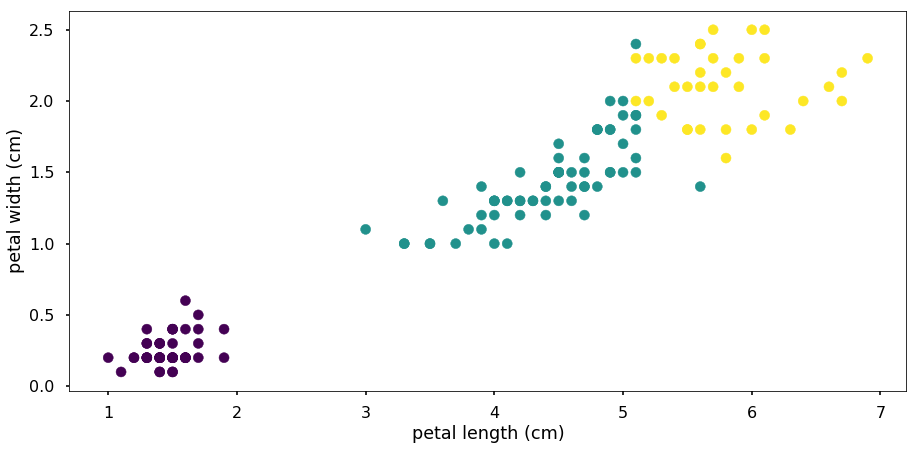

In [49]:
plt.figure(figsize=(15, 7))
plt.scatter(Iris['data'][:, 2], Iris['data'][:, 3], s=100, c=sc_pred)
plt.xlabel(Iris['feature_names'][2])
plt.ylabel(Iris['feature_names'][3])
plt.show()

# How well did it go?

## Performance measures

In [50]:
import sklearn.metrics.cluster as metrics

In [51]:
dir(metrics)[7:]

['adjusted_mutual_info_score',
 'adjusted_rand_score',
 'bicluster',
 'calinski_harabaz_score',
 'completeness_score',
 'consensus_score',
 'contingency_matrix',
 'davies_bouldin_score',
 'entropy',
 'expected_mutual_info_fast',
 'expected_mutual_information',
 'fowlkes_mallows_score',
 'homogeneity_completeness_v_measure',
 'homogeneity_score',
 'mutual_info_score',
 'normalized_mutual_info_score',
 'silhouette_samples',
 'silhouette_score',
 'supervised',
 'unsupervised',
 'v_measure_score']

In [52]:
# Assumption : you have the labels (ranges from -1 to 1)
metrics.adjusted_rand_score(Iris.target, y_pred)

0.7436826319432357

In [53]:
# Assumption : no labels (data in reality, ranges from -1 to 1)
metrics.silhouette_score(Iris.data, y_pred, metric='euclidean')

0.5511573791952854

# Optimize your work

### What clustering method suits your goal best?
### Which of its parameters must be tuned?
### Which of features subsets yield a better result?

### Example : Finding the optimal 'bandwidth'

In [54]:
import numpy as np

In [55]:
%%time
bandwidths, size_results = np.linspace(0.1, 2, 40), []
for b in bandwidths:
    y_pred = MeanShift(bandwidth=b).fit_predict(Iris['data'])
    ar_score = metrics.adjusted_rand_score(y_pred, Iris.target)
    size_results.append(ar_score)

Wall time: 12.7 s


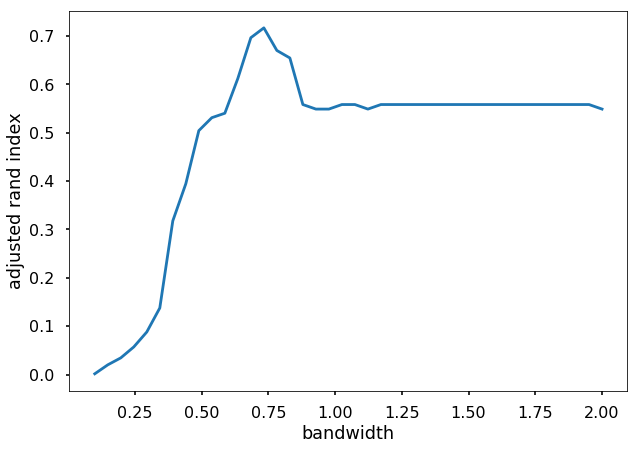

In [56]:
plt.figure(figsize = (10, 7))
plt.plot(bandwidths, size_results)
plt.xlabel('bandwidth')
plt.ylabel('adjusted rand index')
plt.show()

### Example : The magic box which spits out best features

In [57]:
from itertools import chain, combinations

def magic_black_box(data):
 
    feat_results = []
    for item in chain.from_iterable(combinations([0, 1, 2, 3], r) for r in range(1, 5)):
        X = data[:, list(item)]
        prediction = MeanShift(bandwidth=.75).fit(X).predict(X)
        if len(set(prediction)) == 3:
            ar_score = metrics.adjusted_rand_score(prediction, Iris.target)
            feat_results.append((item, ar_score))
        
    return max(feat_results, key=lambda x:x[1])

In [58]:
magic_black_box(Iris['data'])

((2, 3), 0.8856970310281228)

# Finally! Visit them : 

## [Scikit-learn](http://scikit-learn.org/stable/documentation.html)
## [Scipy tutorials](https://scipy2017.scipy.org/ehome/index.php?eventid=220975&)


# No matter what you do for a clustering, let the data talk to you . . .

Image sources:
* https://mc.ai/visualization-and-understanding-iris-dataset/
* https://scikit-learn.org/stable/modules/clustering.html
* https://www.slideshare.net/PyData/julie-michelman-pandas-pipelines-and-custom-transformers